In [1]:
! pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 23

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging
import sklearn

emoevent_train_csv_path = '/content/drive/My Drive/Colab Notebooks/datasets/emoevent_train.csv'
emoevent_test_csv_path = '/content/drive/My Drive/Colab Notebooks/datasets/emoevent_test.csv'

emoevent_train = pd.read_csv(emoevent_train_csv_path)
emoevent_test = pd.read_csv(emoevent_test_csv_path)

emoevent_bertaug_path = '/content/drive/MyDrive/Colab Notebooks/datasets/Copy of emoevent_BertAug_5.csv'
emoevent_data = pd.read_csv(emoevent_bertaug_path, encoding='utf-8')

print(emoevent_train.shape)
print(emoevent_data.shape)
emoevent_data.head(15)

(5112, 2)
(25560, 3)


,text,label,paraphrase
0,What is one thing that you can not live withou...,4,his help will one thing gone that children can...
1,What is one thing that you can not live withou...,4,now! one thing that you can not part without? ...
2,What is one thing that you can not live withou...,4,what is which one thing. that nowadays you can...
3,What is one thing that you can not live withou...,4,what be h truly 1 rare thing that you can not ...
4,What is one thing that you can not live withou...,4,what is essentially one thing that you can rat...
5,Hahahhaha bells will be ringing to show solida...,0,& hahahhaha bells will absolutely be down ring...
6,Hahahhaha bells will be ringing to show solida...,0,hahahhaha bells would say ringing to show soli...
7,Hahahhaha bells will be ringing to show solida...,0,what hahahhaha bells will truly be ringing to ...
8,Hahahhaha bells will be ringing to show solida...,0,hahahhaha done up? will be ringing to show sol...
9,Hahahhaha bells will be ringing to show solida...,0,more bells will be ringing to show solidarity ...


Concatenate train and praphased data




In [8]:
parafrase = emoevent_data[['paraphrase', 'label']].copy()
parafrase = parafrase.drop_duplicates()
parafrase.rename(columns={"paraphrase": "tweet","label":"emotion"}, inplace = True)

emoevent_train = emoevent_train.append(parafrase,ignore_index=True)
print(emoevent_train.shape)

(30672, 2)


<ipython-input-8-832523618639>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emoevent_train = emoevent_train.append(parafrase,ignore_index=True)


In [9]:
print(emoevent_train.head(10))

                                               tweet  emotion
0  What is one thing that you can not live withou...        4
1  Hahahhaha bells will be ringing to show solida...        0
2  The Compassionate Civilization Collaborative (...        2
3  They say much was spared, but the images of HA...        5
4  "I may be small. I may be a girl, but I won’t ...        4
5  HASHTAG Today we have begun the definitive pha...        3
6  "The highest education is that which does not ...        4
7  “Hi Friends! Lots of people are making comment...        4
8  HASHTAG election: socialist party HASHTAG decl...        4
9  THAT EPISODE WAS FUCKING EVERYTHING... 🤯🤯🤯🤯🤯 H...        3


In [10]:
train_df = pd.DataFrame(emoevent_train)
train_df.columns = ["text", "labels"]

eval_df = pd.DataFrame(emoevent_test)
eval_df.columns = ["text", "labels"]

In [11]:
import torch
from torch import cuda
import gc

def empty_cache(model, optimizer):
  device = 'cuda' if cuda.is_available() else 'cpu'
  with torch.no_grad():
      torch.cuda.empty_cache()
  gc.collect()

In [12]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, precision_score, recall_score, confusion_matrix

def f1_multiclass(labels, preds):
  return f1_score(labels, preds, average='macro')

def precision_multiclass(labels,preds):
  return precision_score(labels, preds, average='macro')

def recall_multiclass(labels,preds):
  return recall_score(labels, preds, average='macro')

def confusion_matrix_multiclass(labels, preds):
  cm = confusion_matrix(labels, preds)
  return cm

In [13]:
results = []

reps = 3
for i in range(reps):

  model = ClassificationModel(
    "roberta", 
    "roberta-base",
    num_labels=7, 
    args={'num_train_epochs':2,
          'max_seq_length':256,
          'learning_rate':1e-5,
          'overwrite_output_dir': True, 
          'custom_callback': empty_cache
          }
  )

  model.train_model(train_df)

  result, model_outputs, wrong_predictions = model.eval_model(eval_df, 
                                                            acc=sklearn.metrics.accuracy_score,
                                                            f1=f1_multiclass,
                                                            precision=precision_multiclass,
                                                            recall=recall_multiclass,
                                                            confusion_matrix=confusion_matrix_multiclass
                                                            )

  
  results.append({'accuracy': result['acc'], 'f1': result['f1'], 'precision': result['precision'], 'recall': result['recall'], 'confusion_matrix_results': result['confusion_matrix']})

print('accuracy, f1, precision, recall, confusion_matrix:')
for i in results:
  print(i['accuracy'], i['f1'], i['precision'], i['recall'], i['confusion_matrix_results'])

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

  0%|          | 0/30672 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/3834 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/3834 [00:00<?, ?it/s]

  0%|          | 0/2191 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/274 [00:00<?, ?it/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

  0%|          | 0/30672 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/3834 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/3834 [00:00<?, ?it/s]

  0%|          | 0/2191 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/274 [00:00<?, ?it/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

  0%|          | 0/30672 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/3834 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/3834 [00:00<?, ?it/s]

  0%|          | 0/2191 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/274 [00:00<?, ?it/s]

accuracy, f1, precision, recall, confusion_matrix:
0.6198083067092651 0.4916088330055527 0.5338692677363729 0.4664851718964625 [[ 36  41   1   3  34   2   1]
 [ 18 113   2   6  86   2   2]
 [  2   0  14   2  24   2   1]
 [  4   1   0 444 149   6   8]
 [ 41  61   6 174 670  24  16]
 [  4   6   0  10  38  64   3]
 [  3   2   1  15  31   1  17]]
0.6138749429484254 0.48791711200979 0.540282020553634 0.457486480453642 [[ 31  37   0   2  46   2   0]
 [ 20 110   3   6  88   0   2]
 [  1   1  14   0  25   3   1]
 [  3   1   0 430 165   5   8]
 [ 32  61   6 174 679  25  15]
 [  1   9   0  13  38  63   1]
 [  4   1   0  14  31   2  18]]
0.6252852578731173 0.5081333298021083 0.5706695027575316 0.47743922032336483 [[ 36  39   0   3  38   1   1]
 [ 11 114   2   7  91   1   3]
 [  1   1  13   3  23   2   2]
 [  5   1   0 435 156   5  10]
 [ 30  71   3 165 682  21  20]
 [  2   6   0  10  36  69   2]
 [  3   2   0  12  31   1  21]]


Confusion matrix with percentages

[[ 36  41   1   3  34   2   1]
 [ 18 113   2   6  86   2   2]
 [  2   0  14   2  24   2   1]
 [  4   1   0 444 149   6   8]
 [ 41  61   6 174 670  24  16]
 [  4   6   0  10  38  64   3]
 [  3   2   1  15  31   1  17]]


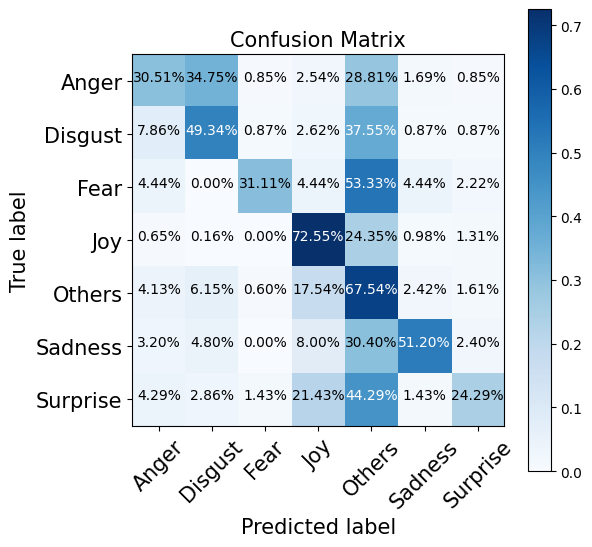

[[ 31  37   0   2  46   2   0]
 [ 20 110   3   6  88   0   2]
 [  1   1  14   0  25   3   1]
 [  3   1   0 430 165   5   8]
 [ 32  61   6 174 679  25  15]
 [  1   9   0  13  38  63   1]
 [  4   1   0  14  31   2  18]]


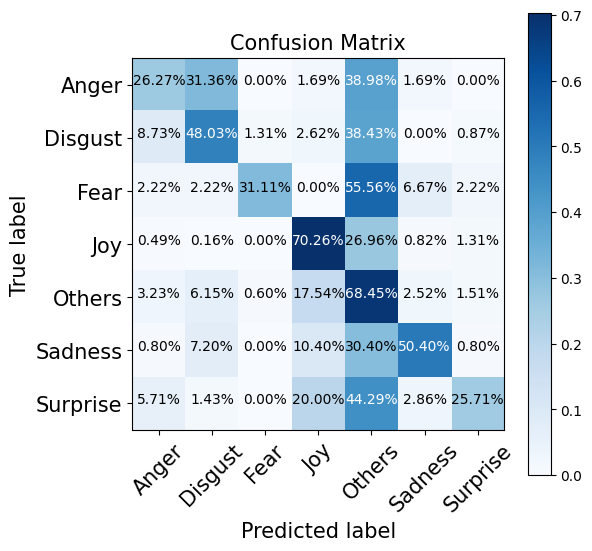

[[ 36  39   0   3  38   1   1]
 [ 11 114   2   7  91   1   3]
 [  1   1  13   3  23   2   2]
 [  5   1   0 435 156   5  10]
 [ 30  71   3 165 682  21  20]
 [  2   6   0  10  36  69   2]
 [  3   2   0  12  31   1  21]]


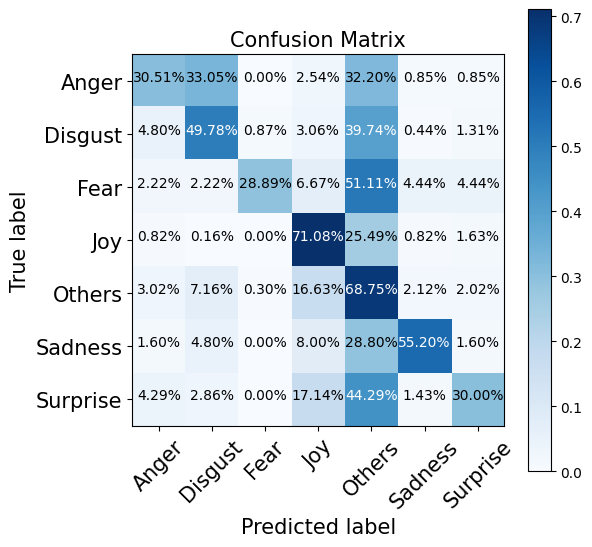

In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(cm, classes, ax,
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    tick_marks = np.arange(len(classes))

    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45, fontsize=15)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, fontsize=15)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j] * 100, fmt) + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    ax.set_ylabel('True label', fontsize=15)
    ax.set_xlabel('Predicted label', fontsize=15)


for idx, result in enumerate(results):
    fig, ax = plt.subplots(figsize=(6, 6))
    cm = result['confusion_matrix_results']
    print(cm)
    plot_confusion_matrix(cm, ['Anger', 'Disgust', 'Fear', 'Joy', 'Others', 'Sadness', 'Surprise'], ax)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()

Confusion matrix with decimal 

[[ 36  41   1   3  34   2   1]
 [ 18 113   2   6  86   2   2]
 [  2   0  14   2  24   2   1]
 [  4   1   0 444 149   6   8]
 [ 41  61   6 174 670  24  16]
 [  4   6   0  10  38  64   3]
 [  3   2   1  15  31   1  17]]


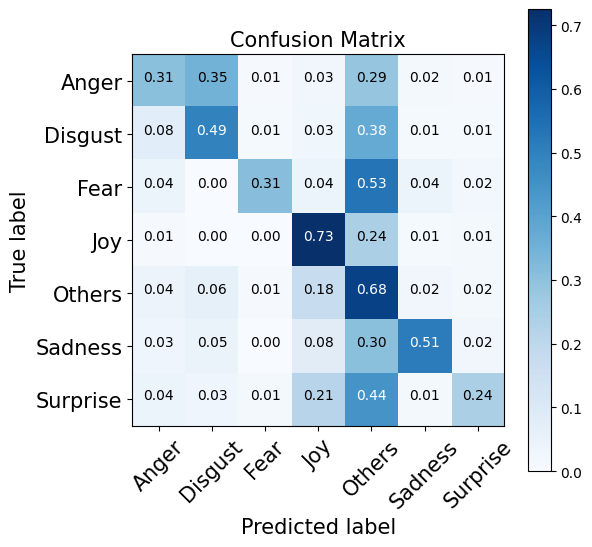

[[ 31  37   0   2  46   2   0]
 [ 20 110   3   6  88   0   2]
 [  1   1  14   0  25   3   1]
 [  3   1   0 430 165   5   8]
 [ 32  61   6 174 679  25  15]
 [  1   9   0  13  38  63   1]
 [  4   1   0  14  31   2  18]]


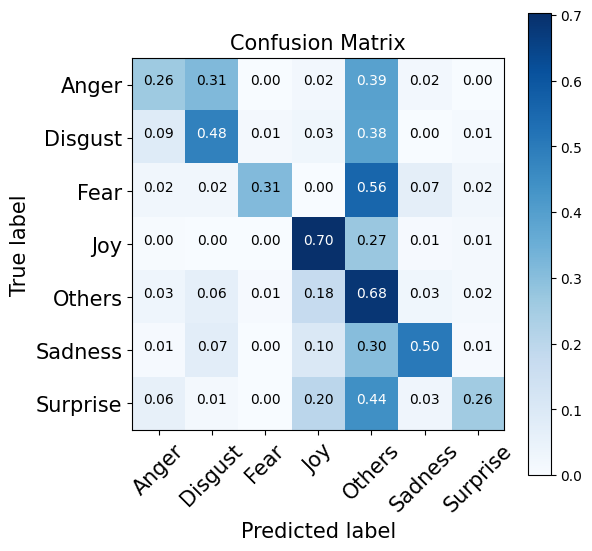

[[ 36  39   0   3  38   1   1]
 [ 11 114   2   7  91   1   3]
 [  1   1  13   3  23   2   2]
 [  5   1   0 435 156   5  10]
 [ 30  71   3 165 682  21  20]
 [  2   6   0  10  36  69   2]
 [  3   2   0  12  31   1  21]]


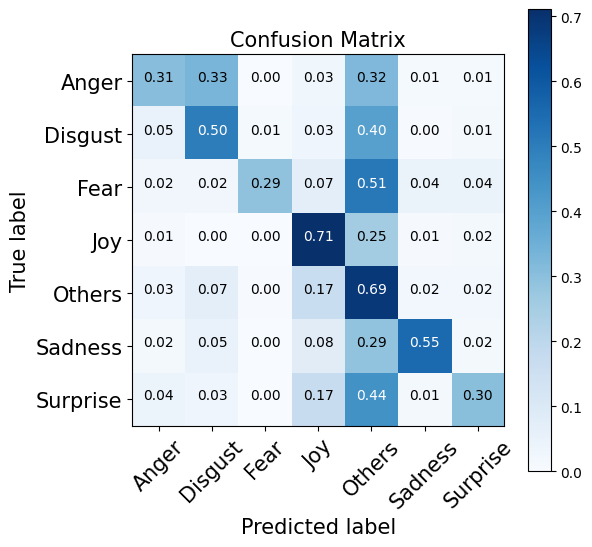

In [16]:
def plot_confusion_matrix_decimals(cm, classes, ax,
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    tick_marks = np.arange(len(classes))

    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45, fontsize=15)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, fontsize=15)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    ax.set_ylabel('True label', fontsize=15)
    ax.set_xlabel('Predicted label', fontsize=15)



for idx, result in enumerate(results):
    fig, ax = plt.subplots(figsize=(6, 6))
    cm = result['confusion_matrix_results']
    print(cm)
    plot_confusion_matrix_decimals(cm, ['Anger', 'Disgust', 'Fear', 'Joy', 'Others', 'Sadness', 'Surprise'], ax)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()
